# Introduction:
In the bustling realm of corporate life, a company sought to understand its employees better. To unravel the mysteries of workforce dynamics, a dataset containing valuable employee information was analyzed. This dataset held insights that could lead to enhanced employee satisfaction, reduced attrition, and ultimately, a more thriving workplace.

# Step 1: Import nessesary Libraries



In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,  roc_curve, auc
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import plotly.express as px
import os
import warnings
warnings.filterwarnings("ignore")

# Step 2: Read Dataset

In [2]:
HR_data= pd.read_csv("/content/HR_Analytics.csv")

In [3]:
print("Shape of data :", HR_data.shape)

Shape of data : (1480, 38)


In [4]:
HR_data.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [5]:
HR_data.set_index('EmpID', inplace=True)

In [6]:
# describing the HR_data
HR_data.describe(include='all')

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480,1480,1480,1480.000000,1480,1480.000000,1480.000000,1480,1480.0,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
unique,NaN,5,2,4,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,26-35,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,611,1242,1042,NaN,967,NaN,NaN,607,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.917568,NaN,NaN,NaN,801.384459,NaN,9.220270,2.910811,NaN,1.0,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,NaN,NaN,NaN,403.126988,NaN,8.131201,1.023796,NaN,0.0,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,NaN,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,800.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


**From data description we can find that The dataset consists of 1,480 employees, characterized by a diverse range of attributes, including age, department, attrition status, and relationship satisfaction. It provides insights into the demographic landscape of the workforce, with an average age of 36.9 years and various educational backgrounds, primarily in Life Sciences and Medical fields. The company faces challenges related to attrition, as over 600 employees have left, prompting a need for improved engagement strategies. Relationship satisfaction averages 2.71, indicating room for growth in team dynamics, while employees have an average tenure of 7 years, demonstrating loyalty amidst challenges.**

In [7]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1480 entries, RM297 to RM1210
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1480 non-null   int64  
 1   AgeGroup                  1480 non-null   object 
 2   Attrition                 1480 non-null   object 
 3   BusinessTravel            1480 non-null   object 
 4   DailyRate                 1480 non-null   int64  
 5   Department                1480 non-null   object 
 6   DistanceFromHome          1480 non-null   int64  
 7   Education                 1480 non-null   int64  
 8   EducationField            1480 non-null   object 
 9   EmployeeCount             1480 non-null   int64  
 10  EmployeeNumber            1480 non-null   int64  
 11  EnvironmentSatisfaction   1480 non-null   int64  
 12  Gender                    1480 non-null   object 
 13  HourlyRate                1480 non-null   int64  
 14  JobInvo

In [8]:
# Read All uniuqe Values in each Column
unique_values = HR_data.apply(lambda x: x.unique()).to_frame()

unique_values

,0
Age,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2..."
AgeGroup,"[18-25, 26-35, 36-45, 46-55, 55+]"
Attrition,"[Yes, No]"
BusinessTravel,"[Travel_Rarely, Travel_Frequently, Non-Travel,..."
DailyRate,"[230, 812, 1306, 287, 247, 1124, 544, 1431, 52..."
Department,"[Research & Development, Sales, Human Resources]"
DistanceFromHome,"[3, 10, 5, 8, 1, 14, 22, 2, 21, 9, 25, 6, 4, 1..."
Education,"[3, 2, 1, 4, 5]"
EducationField,"[Life Sciences, Medical, Marketing, Technical ..."
EmployeeCount,[1]


In [9]:
# Initialize lists to hold column names based on unique value counts
binary_columns = []
three_value_columns = []
more_value_columns = []

# Loop through the columns in the DataFrame
for col in HR_data.select_dtypes(include='object').columns:  # Select only object columns
    unique_values = HR_data[col].nunique()
    if unique_values == 2:
        binary_columns.append(col)
    elif unique_values == 3:
        three_value_columns.append(col)
    elif unique_values > 3:
        more_value_columns.append(col)

# Print the results
print("Binary columns:", binary_columns)
print("Three-value columns:", three_value_columns)
print("More-value columns:", more_value_columns)


Binary columns: ['Attrition', 'Gender', 'OverTime']
Three-value columns: ['Department', 'MaritalStatus']
More-value columns: ['AgeGroup', 'BusinessTravel', 'EducationField', 'JobRole', 'SalarySlab']


# Step 3: Data Preprocessing
## 3.1: Categorical Encoding

In [10]:
# Label Encoder for specific Columns
Columns_for_Label_Encoder = ['Attrition', 'Gender', 'OverTime','MaritalStatus','Over18', 'AgeGroup','BusinessTravel', 'SalarySlab', 'JobRole']
label_encoder = LabelEncoder()
label_encoder_cols = Columns_for_Label_Encoder
for col in label_encoder_cols:
    HR_data[col] = label_encoder.fit_transform(HR_data[col])


In [11]:
HR_data = pd.get_dummies(HR_data, columns=['Department', 'EducationField'],dtype='int')

In [12]:
HR_data.head()

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
EmpID,,,,,,,,,,,,,,,,,,,,,
RM297,18,0,1,3,230,3,3,1,405,3,...,0.0,0,1,0,0,1,0,0,0,0
RM302,18,0,0,3,812,10,3,1,411,4,...,0.0,0,0,1,0,0,0,1,0,0
RM458,18,0,1,2,1306,5,3,1,614,2,...,0.0,0,0,1,0,0,1,0,0,0
RM728,18,0,0,0,287,5,2,1,1012,2,...,0.0,0,1,0,0,1,0,0,0,0
RM829,18,0,1,0,247,8,1,1,1156,3,...,0.0,0,1,0,0,0,0,1,0,0


In [13]:
HR_data.isnull().sum()

,0
Age,0
AgeGroup,0
Attrition,0
BusinessTravel,0
DailyRate,0
DistanceFromHome,0
Education,0
EmployeeCount,0
EmployeeNumber,0
EnvironmentSatisfaction,0


# Data Analysis of Null Values and Relationships
After thoroughly examining the dataset, I checked for null values and discovered that one specific column contains missing data. Understanding the implications of this null value is crucial for our analysis. To address this, I aim to investigate the relationships between this column and others in the dataset to determine whether it can be dropped or if it should be replaced with its mean value.

By analyzing the correlation with other relevant features, I can uncover insights into how this column interacts with key attributes. This will guide our decision on:

### Dropping the Column:
If the column exhibits a weak relationship with important performance indicators or contains a significant percentage of null values with minimal contribution to our analysis, it may be appropriate to drop it.

### Replacing with Mean:
 If the column has a strong correlation with other key features, replacing the null value with the mean could be a suitable strategy. This would allow us to retain valuable information while minimizing the impact of the missing data.

Next, I will conduct a correlation analysis to visualize the relationships and make an informed decision regarding the handling of the null value in this specific column

# Step 4: Data Analysis And Visualizaion

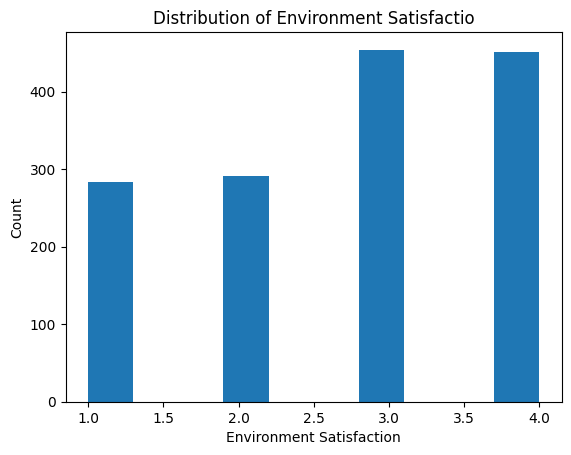

In [14]:
#Plotting the count of YearsWithCurrManager column
plt.hist(HR_data['EnvironmentSatisfaction'])
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Environment Satisfactio')
plt.show()

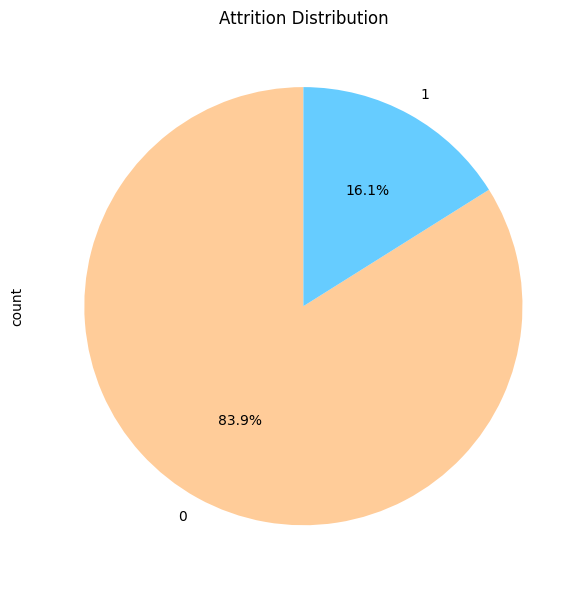

In [15]:
import matplotlib.pyplot as plt

# Set up the subplots for pie charts
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# Pie chart for 'Attrition' distribution
HR_data['Attrition'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes, colors=['#ffcc99', '#66ccff'],startangle=90)
axes.set_title('Attrition Distribution')

# Show the plots
# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()



**The pie charts illustrate the distribution of attrition within the HR data. The attrition Distribution chart reveals that 16.1% of the data represents "Yes," while 83.9% corresponds to "No," indicating a significant imbalance in the dataset.**

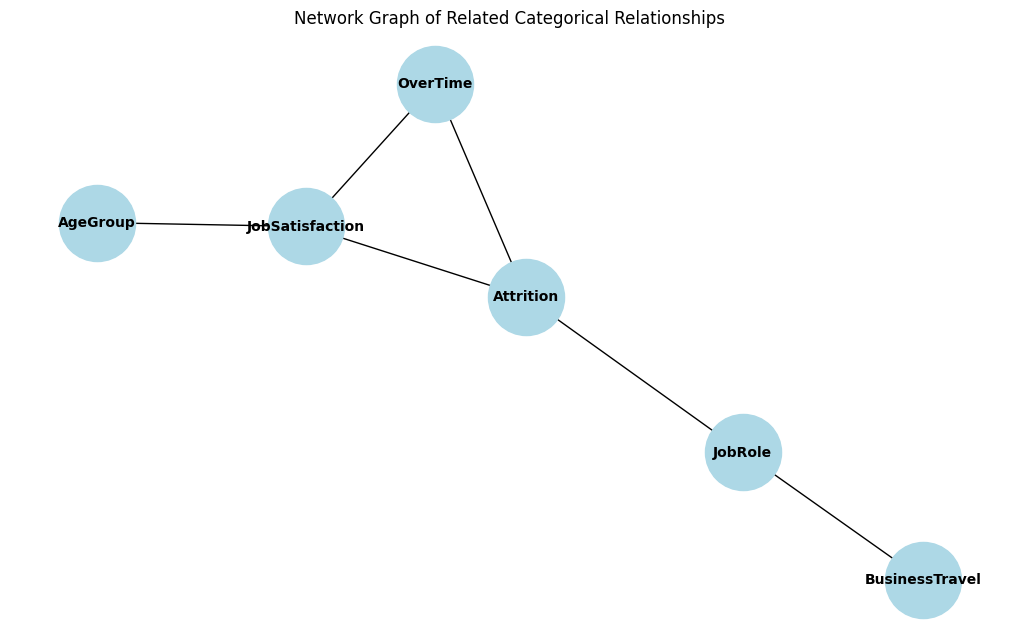

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a network graph for categorical relationships
G = nx.Graph()

# Define relationships based on your data
edges = [
    ('Attrition', 'JobSatisfaction'),   # Job satisfaction impacts attrition
    ('Attrition', 'OverTime'),           # Overtime may influence attrition
    ('JobSatisfaction', 'OverTime'),     # Job satisfaction can be affected by overtime
    ('AgeGroup', 'JobSatisfaction'),     # Age can influence job satisfaction
    ('BusinessTravel', 'JobRole'),       # Job role may influence travel frequency
    ('JobRole', 'Attrition'),             # Different roles may have varying attrition rates
]

# Add edges to the graph
G.add_edges_from(edges)

# Visualize the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Position nodes using spring layout
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('Network Graph of Related Categorical Relationships')
plt.show()




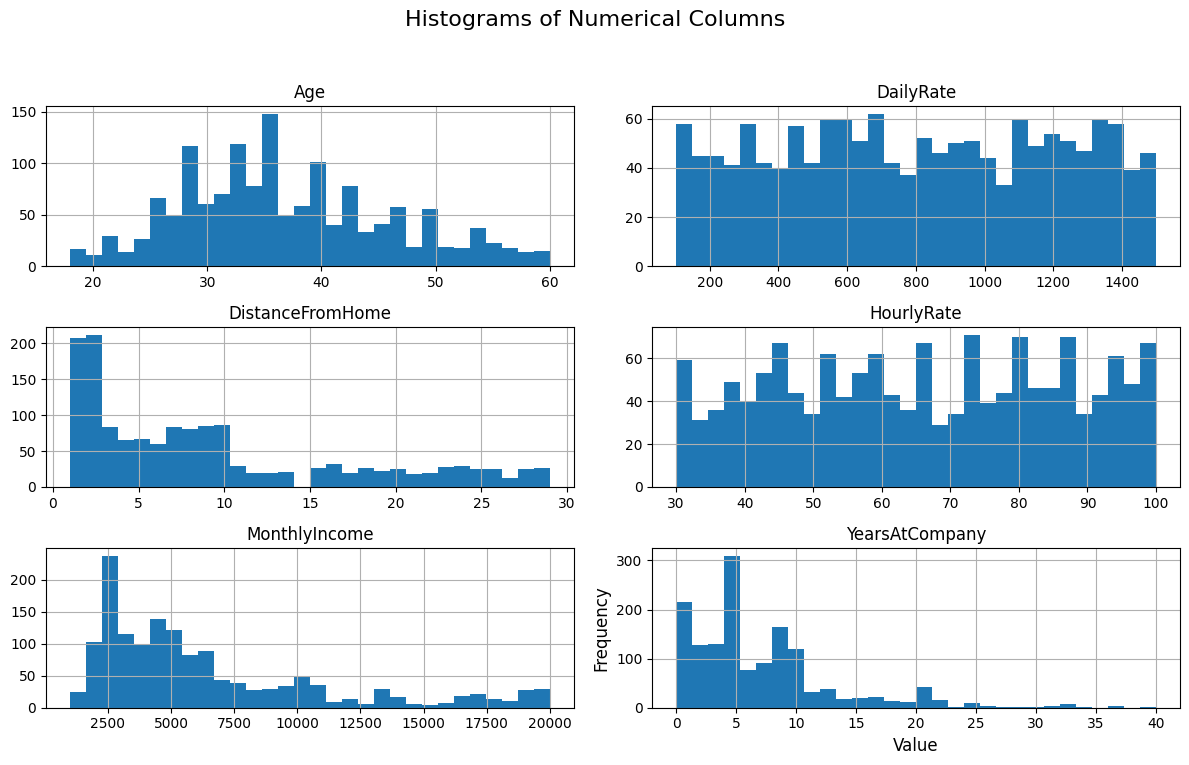

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the relevant columns
HR_data[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'YearsAtCompany']].hist(bins=30, figsize=(12, 8))

# Add titles and labels
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


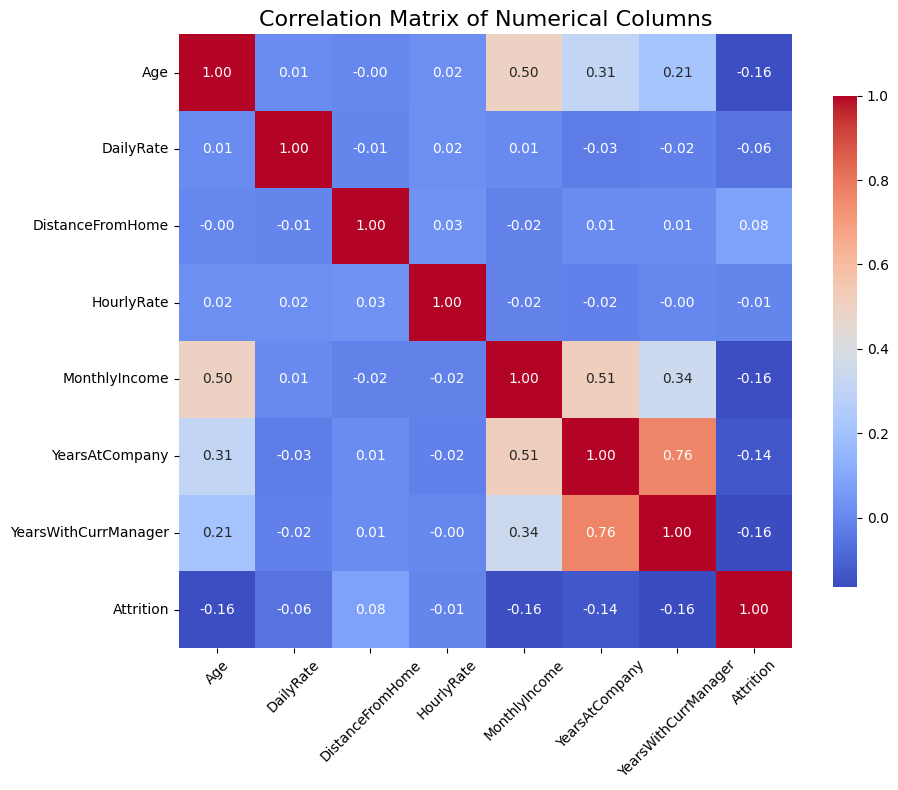

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = HR_data[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'YearsAtCompany','YearsWithCurrManager','Attrition']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Matrix of Numerical Columns', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA)

### Univariate Analysis

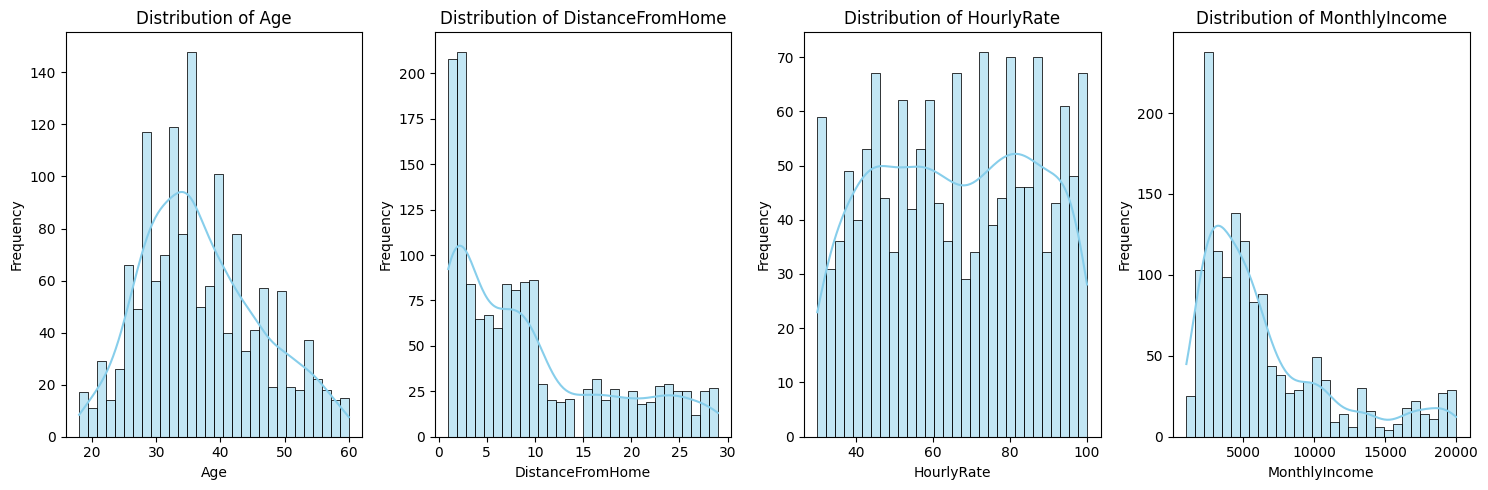

In [19]:
numerical_cols = ['Age', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(HR_data[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Categorical Data Analysis

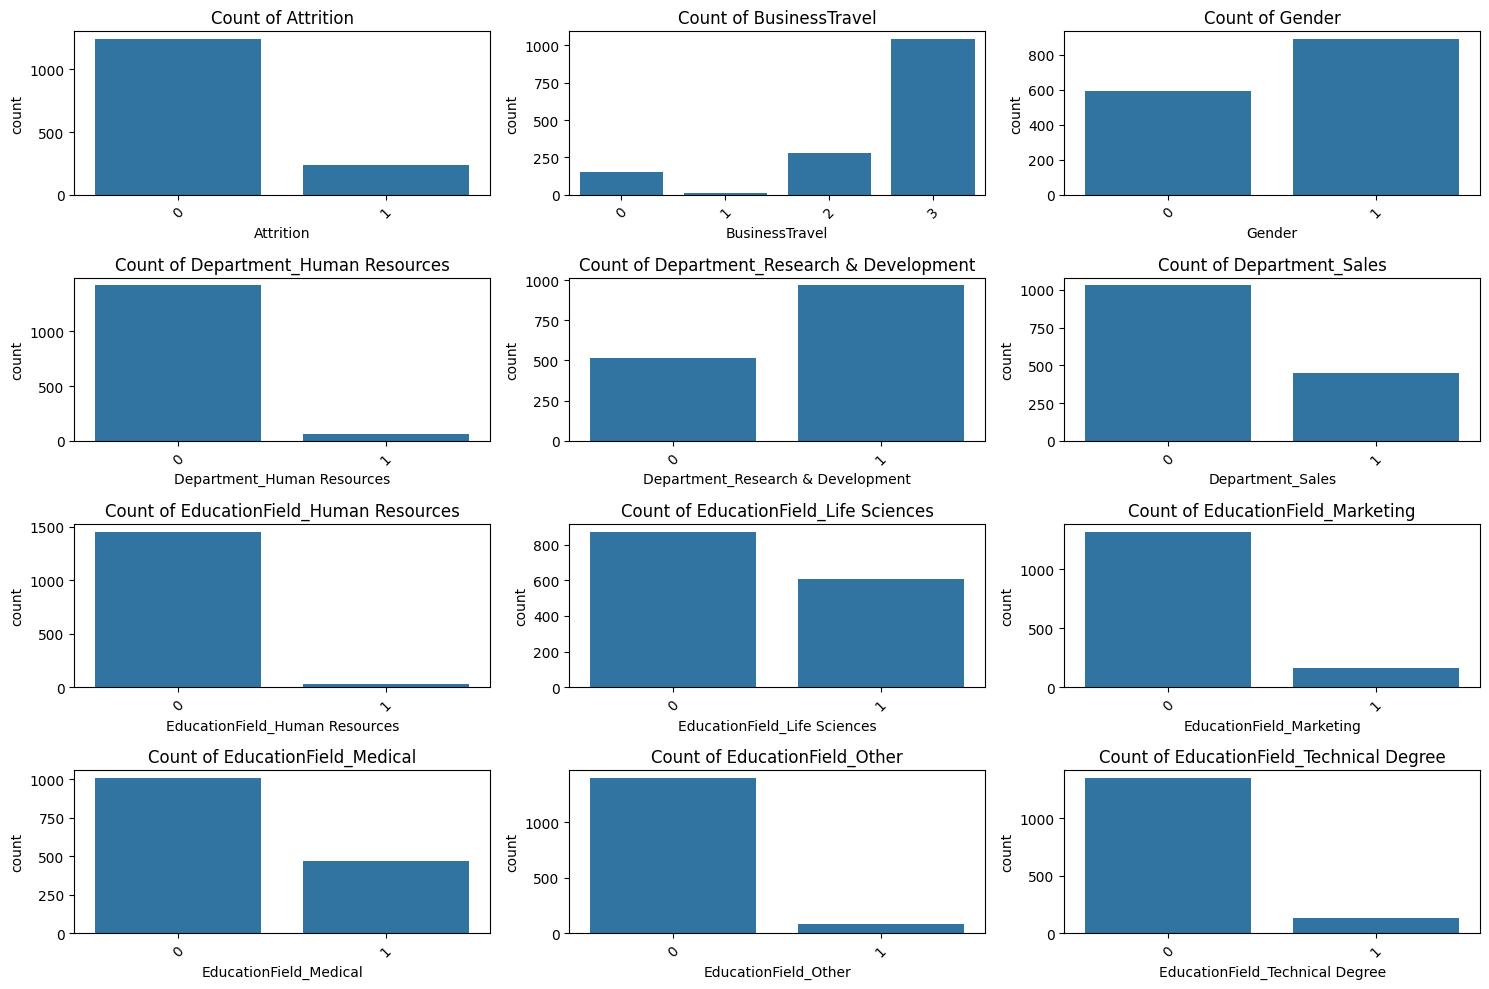

In [20]:

categorical_cols = [
    'Attrition', 'BusinessTravel', 'Gender',
    'Department_Human Resources', 'Department_Research & Development',
    'Department_Sales', 'EducationField_Human Resources',
    'EducationField_Life Sciences', 'EducationField_Marketing',
    'EducationField_Medical', 'EducationField_Other',
    'EducationField_Technical Degree'
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(4, 3, i + 1)  # Adjust the layout based on the number of columns
    sns.countplot(data=HR_data, x=col)  # Removed palette
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


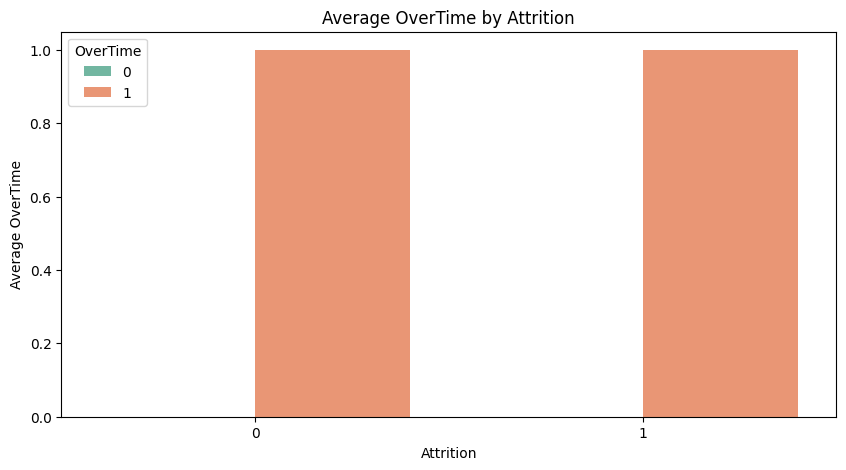

In [21]:
# Bar Plots for Categorical Variables Against Numerical Variables
#MonthlyIncome by Attrition
plt.figure(figsize=(10, 5))
sns.barplot(data=HR_data, x='Attrition', y='OverTime', palette='Set2', hue='OverTime')
plt.title('Average OverTime by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average OverTime')
plt.show()


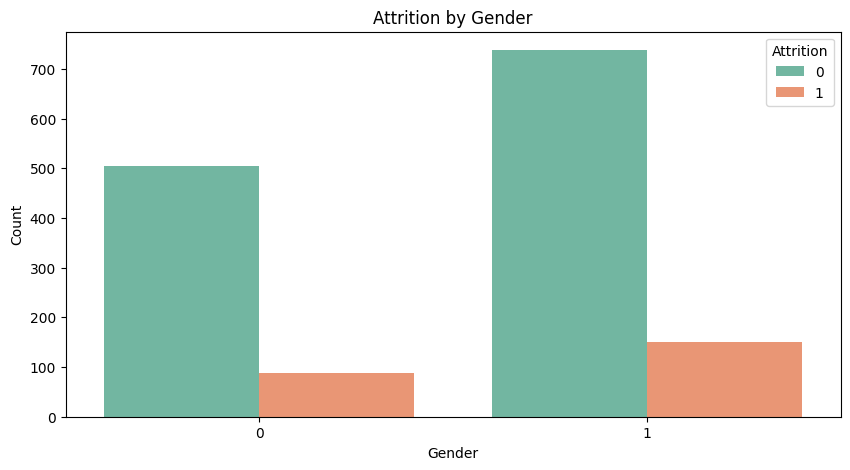

In [22]:
# Grouped Bar Plots
# Attrition by Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=HR_data, x='Gender', hue='Attrition', palette='Set2')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**After thoroughly examining the dataset, I checked for null values and discovered that one specific column contains missing data. Understanding the implications of this null value is crucial for our analysis. To address this, I conducted a data visualization to explore the relationships between this column and others in the dataset.**

**The visualizations provided insights into how this column interacts with key attributes. Based on the analysis, we concluded that we can fill the column with null values using the mean of that column. This approach allows us to retain valuable information while minimizing the impact of the missing data.**

**Next, I will implement this strategy to ensure our dataset is complete and ready for further analysis.**

# 5: Con't Data Preprocessing


### Fill missing Values

In [23]:
# Fill null values in 'YearsWithCurrManager' with the mean of the column
HR_data['YearsWithCurrManager'] = HR_data['YearsWithCurrManager'].fillna(HR_data['YearsWithCurrManager'].mean())


In [24]:
HR_data.isnull().sum()

,0
Age,0
AgeGroup,0
Attrition,0
BusinessTravel,0
DailyRate,0
DistanceFromHome,0
Education,0
EmployeeCount,0
EmployeeNumber,0
EnvironmentSatisfaction,0


### Check For Outlayers

In [25]:

# Function to detect outliers using IQR
def identify_outliers_iqr(data):
    outlier_cols = []
    for col in data.select_dtypes(include='number').columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if ((data[col] < lower_bound).any() or (data[col] > upper_bound).any()):
            outlier_cols.append(col)

    return outlier_cols

# Get columns with outliers
columns_with_outliers = identify_outliers_iqr(HR_data)
columns_with_outliers.remove('Attrition')
print("Columns with outliers:", columns_with_outliers)



Columns with outliers: ['AgeGroup', 'BusinessTravel', 'MonthlyIncome', 'SalarySlab', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Department_Human Resources', 'EducationField_Human Resources', 'EducationField_Marketing', 'EducationField_Other', 'EducationField_Technical Degree']


In [26]:
for column in columns_with_outliers:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = HR_data[column].quantile(0.25)
    Q3 = HR_data[column].quantile(0.75)
    IQR = Q3 - Q1  # Calculate IQR

    # Determine upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the respective bounds
    HR_data[column] = HR_data[column].where(
        (HR_data[column] >= lower_bound) & (HR_data[column] <= upper_bound),
        HR_data[column].clip(lower=lower_bound, upper=upper_bound)
    )


# Step 6: Modeling
## 6.1: Spliting Data

In [27]:
X=HR_data.drop('Attrition',axis=1)
y=HR_data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

## 6.2 Handling Class Imbalance and Feature Scaling

In [28]:
y.value_counts()

,count
Attrition,
0,1242
1,238


In [29]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Apply SMOTEN
smoten = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smoten.fit_resample(X_train, y_train)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## 7.3 Building and Implementing Machine Learning Models

# **RandomForestClassifier**

In [43]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=40, random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

# Make predictions and evaluate for Random Forest
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)
y_test_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
# Evaluate performance for Random Forest
train_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_test_prob_rf)
print(f"Random Forest Training accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Test accuracy: {test_accuracy_rf:.4f}")
print("Random Forest Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_rf))
print(f"Random Forest ROC-AUC: {roc_auc_rf:.4f}")

Random Forest Training accuracy: 0.9298
Random Forest Test accuracy: 0.8671
Random Forest Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       373
           1       0.65      0.37      0.47        71

    accuracy                           0.87       444
   macro avg       0.77      0.66      0.70       444
weighted avg       0.85      0.87      0.85       444

Random Forest ROC-AUC: 0.7949


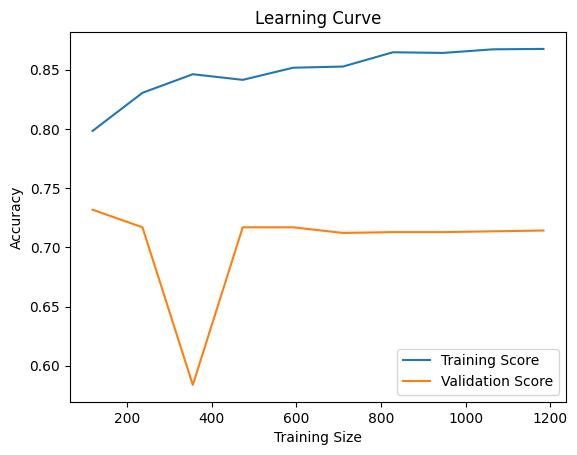

In [31]:
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

# **LogisticRegression**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
clf = LogisticRegression(penalty='l2', C=1.0, random_state=42)
clf.fit(X_train_scaled, y_train_resampled)

# Make predictions and evaluate for Logistic Regression
y_train_pred_logreg = clf.predict(X_train_scaled)
y_test_pred_logreg = clf.predict(X_test_scaled)
y_test_prob_logreg = clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate performance for Logistic Regression
train_accuracy_logreg = accuracy_score(y_train_resampled, y_train_pred_logreg)
test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_test_prob_logreg)

print(f"Logistic Regression Training accuracy: {train_accuracy_logreg:.4f}")
print(f"Logistic Regression Test accuracy: {test_accuracy_logreg:.4f}")
print("Logistic Regression Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_logreg))
print(f"Logistic Regression ROC-AUC: {roc_auc_logreg:.4f}")


Logistic Regression Training accuracy: 0.8711
Logistic Regression Test accuracy: 0.7995
Logistic Regression Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       373
           1       0.38      0.42      0.40        71

    accuracy                           0.80       444
   macro avg       0.64      0.65      0.64       444
weighted avg       0.81      0.80      0.80       444

Logistic Regression ROC-AUC: 0.7975


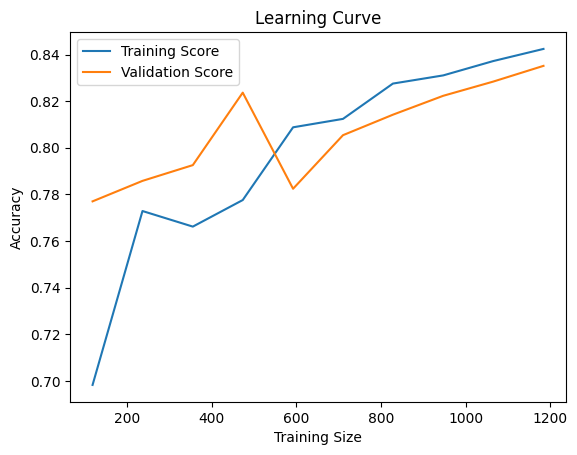

In [33]:
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

# **SVC**


In [34]:
from sklearn.svm import SVC

SVC_model = SVC(kernel='linear', C=1.0, gamma=1, random_state=42 ,cache_size=1000)

SVC_model.fit(X_train_scaled, y_train_resampled)

y_train_pred_SVC = SVC_model.predict(X_train_scaled)
y_test_pred_SVC = SVC_model.predict(X_test_scaled)
y_test_prob_svc = SVC_model.decision_function(X_test_scaled)

train_accuracy_SVC = accuracy_score(y_train_resampled, y_train_pred_SVC)
test_accuracy_SVC = accuracy_score(y_test, y_test_pred_SVC)
roc_auc_svc = roc_auc_score(y_test, y_test_prob_svc)

print(f"SVC Training accuracy: {train_accuracy_SVC:.4f}")
print(f"SVC Test accuracy: {test_accuracy_SVC:.4f}")
print("SVC Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_SVC))
print(f"SVC ROC-AUC: {roc_auc_svc:.4f}")

SVC Training accuracy: 0.8694
SVC Test accuracy: 0.8063
SVC Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       373
           1       0.40      0.41      0.40        71

    accuracy                           0.81       444
   macro avg       0.64      0.65      0.64       444
weighted avg       0.81      0.81      0.81       444

SVC ROC-AUC: 0.7939


# **XGBoost**

In [35]:
# XGBoost Classifier
xgb_model = XGBClassifier(
       max_depth=20,
    learning_rate=0.05,
    min_child_weight=70,
    gamma=1,
    n_estimators=1000,
    eval_metric='mlogloss'
)

# Train with early stopping
xgb_model.fit(X_train_scaled, y_train_resampled)
y_test_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Make predictions and evaluate for XGBoost
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate performance for XGBoost
train_accuracy_xgb = accuracy_score(y_train_resampled, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_test_prob_xgb)

print(f"XGBoost Training accuracy: {train_accuracy_xgb:.4f}")
print(f"XGBoost Test accuracy: {test_accuracy_xgb:.4f}")
print("XGBoost Test Set Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))
print(f"XGBoost ROC-AUC: {roc_auc_xgb:.4f}")

XGBoost Training accuracy: 0.9131
XGBoost Test accuracy: 0.8761
XGBoost Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       373
           1       0.67      0.44      0.53        71

    accuracy                           0.88       444
   macro avg       0.79      0.70      0.73       444
weighted avg       0.86      0.88      0.86       444

XGBoost ROC-AUC: 0.8285


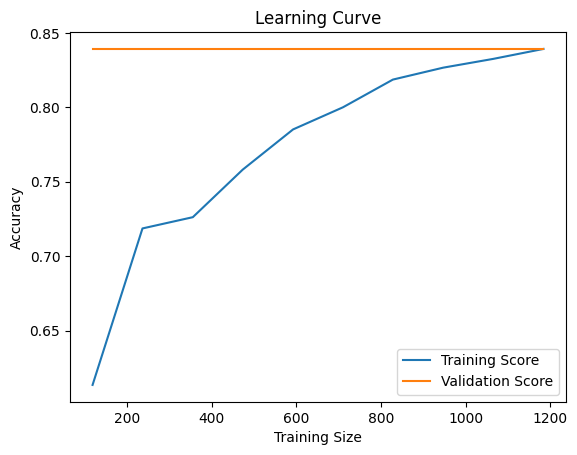

In [36]:
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

**After training various models on the dataset, I evaluated their performance based on accuracy metrics. Among all the models tested, XGBoost emerged as the best performer, yielding the highest accuracy. This impressive result indicates that XGBoost effectively captured the underlying patterns in the data, making it a suitable choice for our predictive analysis.**